In [ ]:
# "Netflix Userbase Analysis Using Kaggle Dataset: Exploring Subscription Trends, Revenue, and Demographics"

In [144]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [145]:
import os
import pandas as pd

In [146]:
#load the netflix dataset

In [147]:
os.getcwd()

'C:\\Users\\dhana'

In [148]:
netflix_data=pd.read_csv("Netflix data.csv")

In [149]:
netflix_data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10/6/2023,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,5/9/2021,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10/7/2022,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,1/5/2023,28-06-23,Germany,33,Male,Smartphone,1 Month


In [150]:
#Display the basic information of the data
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [151]:
#summary of the data
netflix_data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [152]:
#checking for the missing values
netflix_data.isnull().sum() 

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [153]:
# First, check the column names
print(netflix_data.columns)

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')


In [154]:
#1. Analyzing Subscription Types
# Question: What is the distribution of different subscription types?

In [155]:
import matplotlib.pyplot as plt

In [156]:
import seaborn as sns

In [157]:
#count the number of users using the subscription type 
subscription_counts = netflix_data ['Subscription Type'].value_counts()

In [158]:
#Display the counts
print(subscription_counts)

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64


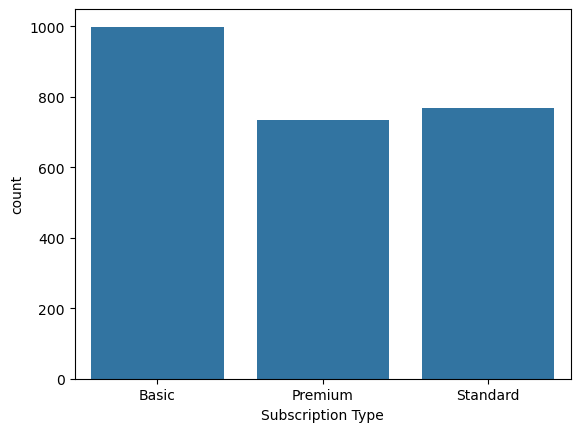

In [159]:
# Visualize the distribution
sns.countplot(x='Subscription Type', data=netflix_data)
plt.xlabel= ('Subscription Type')
plt.ylabel= ('Number of Users')
plt.show()

In [160]:
# 2. Revenue Analysis
# Question: What is the total and average monthly revenue generated by each subscription type?

In [161]:
#Group by subscription Type and calculate total and average revenue
revenue_sta = netflix_data.groupby('Subscription Type')['Monthly Revenue'].agg(["sum","mean"]).reset_index()

In [162]:
#Display the revenue statistics
print(revenue_sta)

  Subscription Type    sum       mean
0             Basic  12469  12.481481
1           Premium   9229  12.590723
2          Standard   9573  12.464844


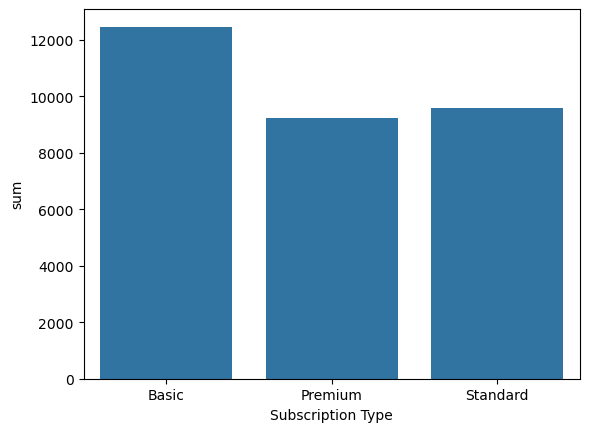

In [163]:
#Visualize the total revenue by Subcription Type
sns.barplot(x="Subscription Type",y="sum", data=revenue_sta)
plt.title = ("Total Monthly Revenue by Subscription Type")
plt.xlabel = ('Subscription Type')
plt.ylabel = ("Total Monthly Revenue")
plt.show()

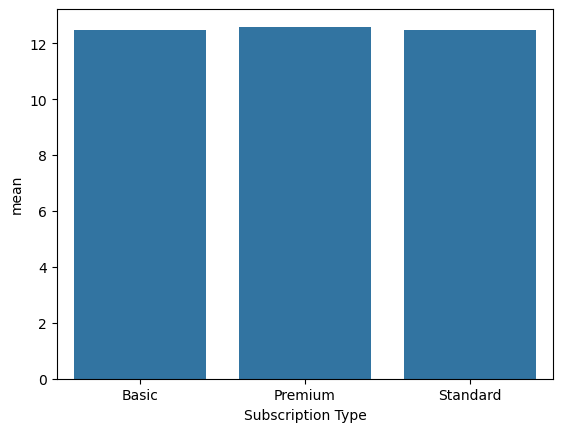

In [164]:
#Visualize the average revenue by Subscription Type
sns.barplot(x="Subscription Type",y= "mean", data=revenue_sta)
plt.title = ("Average Monthly Revenue by Subscription Type")
plt.xlabel = ("Subscription Type")
plt.ylabel = ("Average Monthly Revenue")
plt.show()

In [165]:
#3. User Demographics
#Question: What are the age and gender distributions of Netflix users?

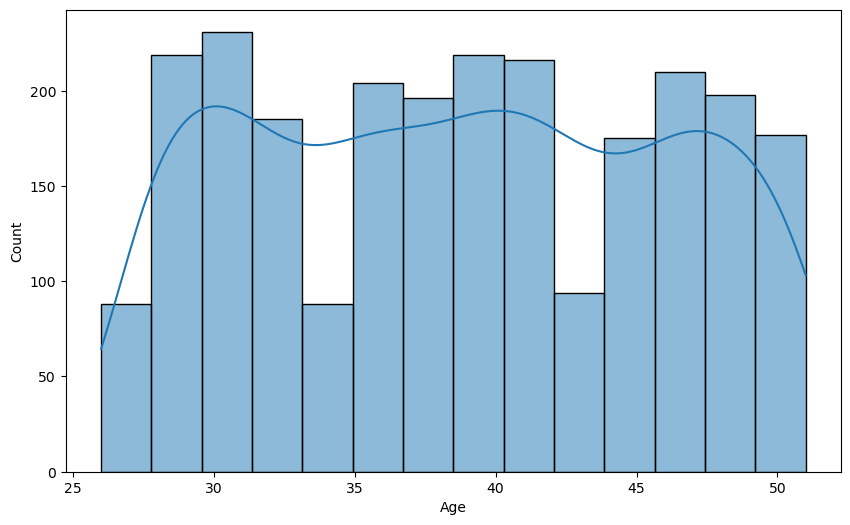

In [166]:
# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['Age'], kde=True)
plt.title = ("AGE DISTRIBUTION OF NETFLIX USERS")
plt.xlabel= ('Age')
plt.ylabel= ('Number of Users')
plt.show()

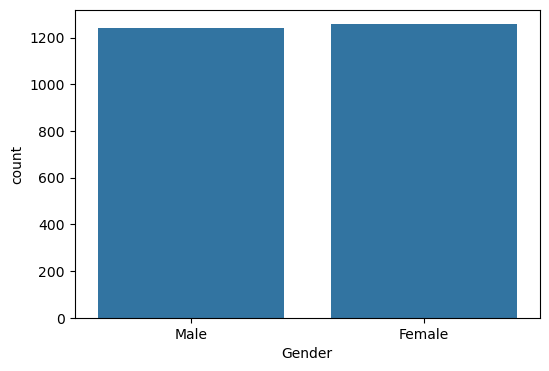

In [167]:
# Plot the gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=netflix_data)
plt.title = ("Gender Distribution Of Netflix Users")
plt.xlabel = ("Gender")
plt.ylabel = ("Number of Users")
plt.show()

In [168]:
# 4. Device Usage Analysis
# Question: What devices are most commonly used by Netflix users?

In [169]:
#Count the number of users by device type
device_counts = netflix_data["Device"].value_counts()

In [170]:
#Display the device counts
print(device_counts)

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64


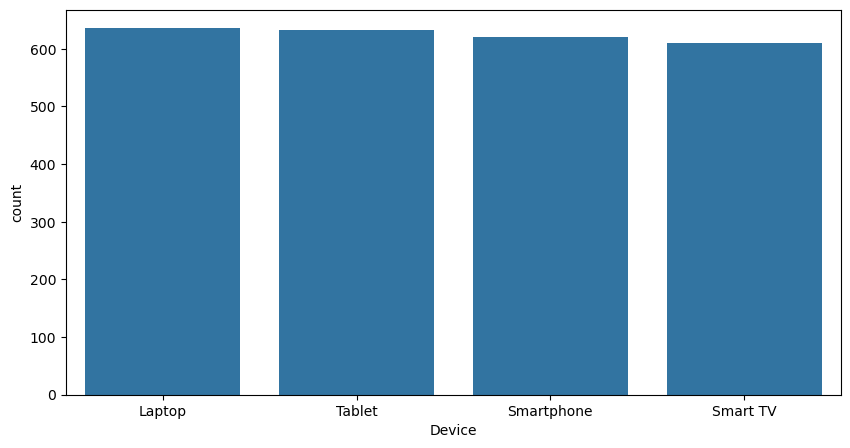

In [171]:
#Visualize the distribution of device usage
plt.figure(figsize=(10,5))
sns.countplot(x="Device",data=netflix_data, order=device_counts.index)
plt.title = ("DEVICE USUAGE AMONG NETFLIX USERS")
plt.xlabel = ("Device")
plt.ylabel = ("Number od Users")
plt.show()

In [172]:
#5. Country_wise Analysis
#Question : Which countries generate the most revenue?

In [173]:
#Group by country and calculate the total revenue
country_revenue = netflix_data.groupby("Country")["Monthly Revenue"].sum().sort_values(ascending=False).reset_index()

In [174]:
#Display the top countries by revenue
print(country_revenue)

          Country  Monthly Revenue
0   United States             5664
1           Spain             5662
2          Canada             3950
3  United Kingdom             2318
4           Italy             2317
5          France             2307
6          Brazil             2285
7       Australia             2271
8         Germany             2260
9          Mexico             2237


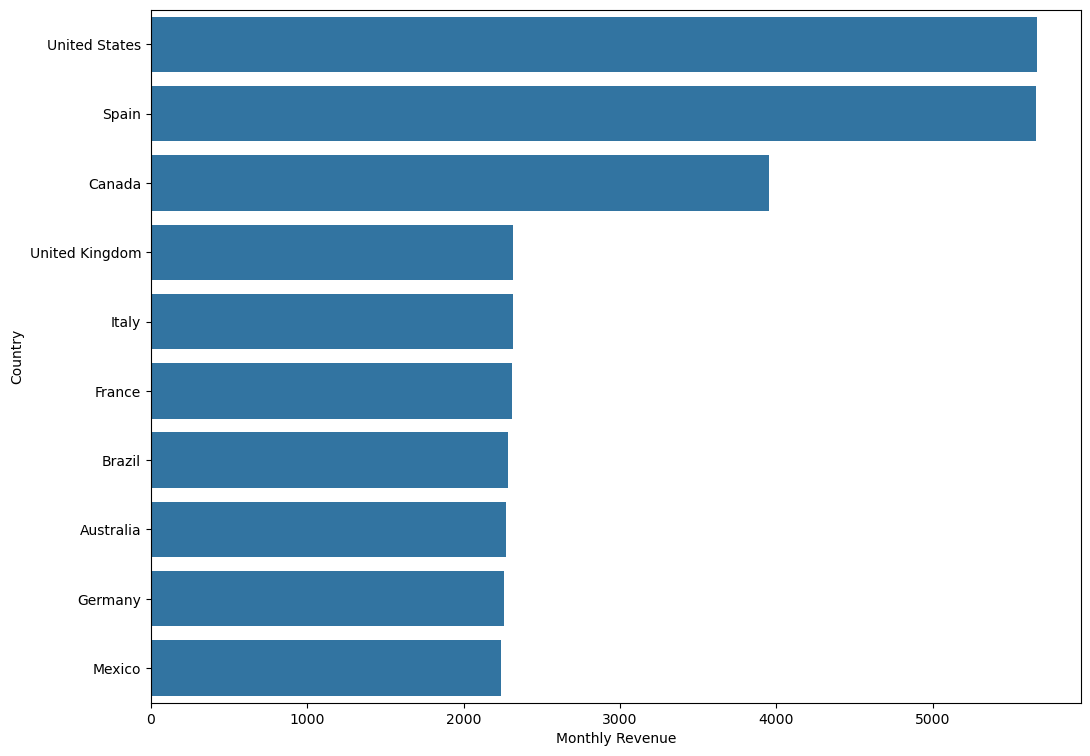

In [175]:
#Visualize the top 10 countries by total revenue
plt.figure(figsize=(12,9))
sns.barplot(x="Monthly Revenue", y="Country", data=country_revenue.head(10))
plt.title =("TOP 10 COUNTRIES BY TOTAL MONTHLY REVENUE")
plt.xlabel =("Total Monthly Revenue")
plt.ylabel =("Country")
plt.show()

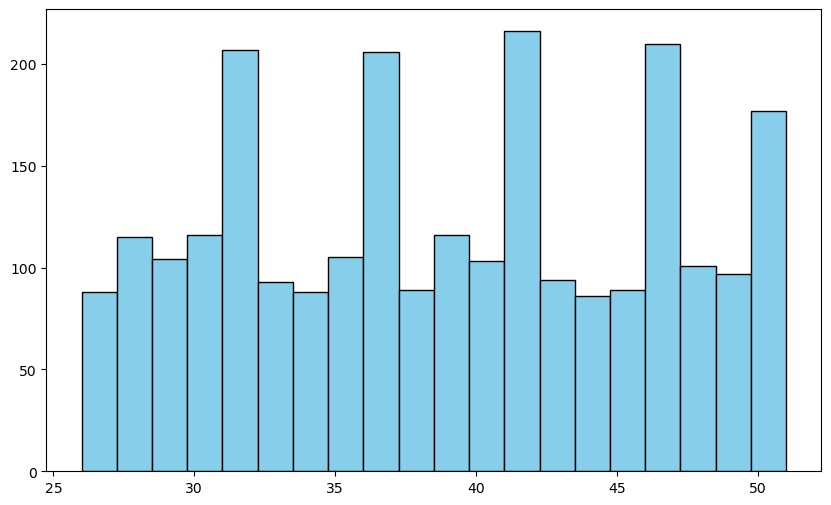

In [176]:
import matplotlib.pyplot as plt

# Plotting the number of users by age
plt.figure(figsize=(10, 6))
plt.hist(netflix_data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title = ('Age Distribution of Netflix Users')  # Setting the title
plt.xlabel = ('Age')
plt.ylabel = ('Number of Users')
plt.show()

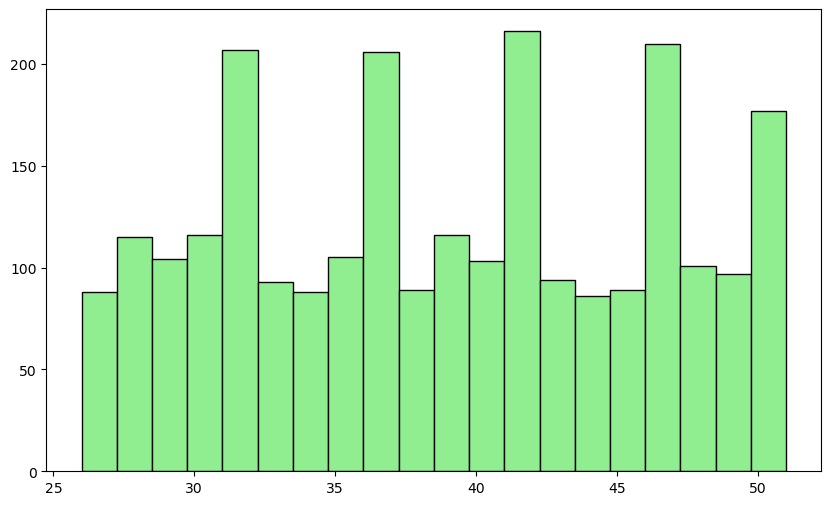

In [177]:
# Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(netflix_data['Age'], bins=20, color='lightgreen', edgecolor='black')
plt.title = ('Age Distribution of Netflix Users')
plt.xlabel= ('Age')
plt.ylabel= ('Number of Users')
plt.show()